In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn.tree as tree
from six import StringIO 
from IPython.display import Image

Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voic
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- D- FA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [2]:
data=pd.read_csv('Parkinsson disease.csv')
print(data.columns)
data.head(10)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [3]:
data = data.rename(columns={"MDVP:Fo(Hz)":"MDVP_FO","MDVP:Fhi(Hz)":"MDVP_FHI","MDVP:Flo(Hz)":"MDVP_FloHz","MDVP:Jitter(%)":"MDVP_JitterPercent","MDVP:Jitter(Abs)":"MDVP_JitterAbs", 'MDVP:RAP':'MDVP_RAP','MDVP:PPQ':'MDVP_PPQ','Jitter:DDP':'Jitter_DDP','MDVP:Shimmer':'MDVP_Shimmer','MDVP:Shimmer(dB)':'MDVP_ShimmerDb','Shimmer:APQ3':'Shimmer_APQ3','Shimmer:APQ5':'Shimmer_APQ5','MDVP:APQ':'MDVP_APQ','Shimmer:DDA':'Shimmer_DDA'})
data.head()
print(data.columns)

Index(['name', 'MDVP_FO', 'MDVP_FHI', 'MDVP_FloHz', 'MDVP_JitterPercent',
       'MDVP_JitterAbs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_ShimmerDb', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')


In [4]:
data.isnull().sum().sum()

0

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                195 non-null    object 
 1   MDVP_FO             195 non-null    float64
 2   MDVP_FHI            195 non-null    float64
 3   MDVP_FloHz          195 non-null    float64
 4   MDVP_JitterPercent  195 non-null    float64
 5   MDVP_JitterAbs      195 non-null    float64
 6   MDVP_RAP            195 non-null    float64
 7   MDVP_PPQ            195 non-null    float64
 8   Jitter_DDP          195 non-null    float64
 9   MDVP_Shimmer        195 non-null    float64
 10  MDVP_ShimmerDb      195 non-null    float64
 11  Shimmer_APQ3        195 non-null    float64
 12  Shimmer_APQ5        195 non-null    float64
 13  MDVP_APQ            195 non-null    float64
 14  Shimmer_DDA         195 non-null    float64
 15  NHR                 195 non-null    float64
 16  HNR     

In [6]:
fulldata=data.describe()
fulldata

,MDVP_FO,MDVP_FHI,MDVP_FloHz,MDVP_JitterPercent,MDVP_JitterAbs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_ShimmerDb,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


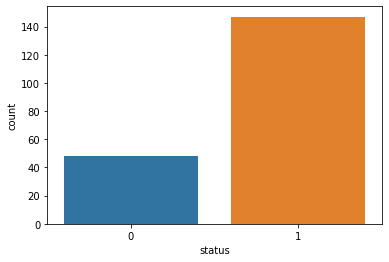

In [7]:
sns.countplot(x='status', data=data)
plt.show()

In [8]:
Parkinsson= len(data[data['status']==1])
Healty = len(data[data['status']==0])
P = Parkinsson/len(data)*100
H = Healty/len(data)*100
print("Parkinsson percentage:", P,"Healthy Percentage:", H)

Parkinsson percentage: 75.38461538461539 Healthy Percentage: 24.615384615384617


In [9]:
target=data['status']
fitur=data.drop(['status','name'], axis=1)
data_yes=data[data.status==1]
data_no=data[data.status==0]
data_upsampled= resample(data_yes, replace=True, n_samples= data_no.shape[0], random_state=150)
data= pd.concat([data_no, data_upsampled])

In [10]:
# data scaling
data_scaled=data.copy()
scaler = StandardScaler()
col_fitur=['MDVP_FO', 'MDVP_FHI', 'MDVP_FloHz', 'MDVP_JitterPercent','MDVP_JitterAbs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer','MDVP_ShimmerDb', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ','Shimmer_DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
'spread2', 'D2', 'PPE']
data_scaled[col_fitur] = scaler.fit_transform(data[col_fitur])
data_scaled.head()

,name,MDVP_FO,MDVP_FHI,MDVP_FloHz,MDVP_JitterPercent,MDVP_JitterAbs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,phon_R01_S07_1,0.726506,-0.045982,1.356713,-0.534528,-0.962829,-0.390448,-0.439918,-0.390447,-0.788300,...,-0.806750,-0.490835,0.871152,-1.0,-0.605829,0.637080,-1.162052,-0.267336,-1.462455,-1.011599
31,phon_R01_S07_2,0.773792,-0.019023,1.357427,-0.649804,-0.962829,-0.522431,-0.555569,-0.522420,-0.833580,...,-0.867912,-0.548562,1.857787,-1.0,-0.504814,0.650228,-1.480934,-0.316362,-0.492222,-1.208193
32,phon_R01_S07_3,0.755225,0.039623,1.377514,-0.719450,-0.962829,-0.609044,-0.567135,-0.609027,-0.698285,...,-0.726822,-0.564671,1.818700,-1.0,-0.173306,0.586166,-0.894604,-0.294792,-2.087939,-0.887765
33,phon_R01_S07_4,0.840547,0.002535,1.456336,-0.796301,-1.003874,-0.691533,-0.675076,-0.692884,-0.866858,...,-0.904749,-0.580445,2.270917,-1.0,-1.137060,0.651719,-1.493475,-0.255879,-2.000611,-1.350560
34,phon_R01_S07_5,0.860719,0.001731,1.438113,-0.801104,-1.003874,-0.687409,-0.678931,-0.686010,-0.864676,...,-0.906139,-0.582795,2.356907,-1.0,-1.418704,0.647247,-1.750317,-0.429890,-2.328278,-1.484195


In [11]:
def cor_matrix(data_scaled):
    corr=data_scaled.corr()
    plt.figure(figsize=(20,20))
    sns.heatmap(corr,annot=True,cmap='OrRd')
    plt.show()
    return corr

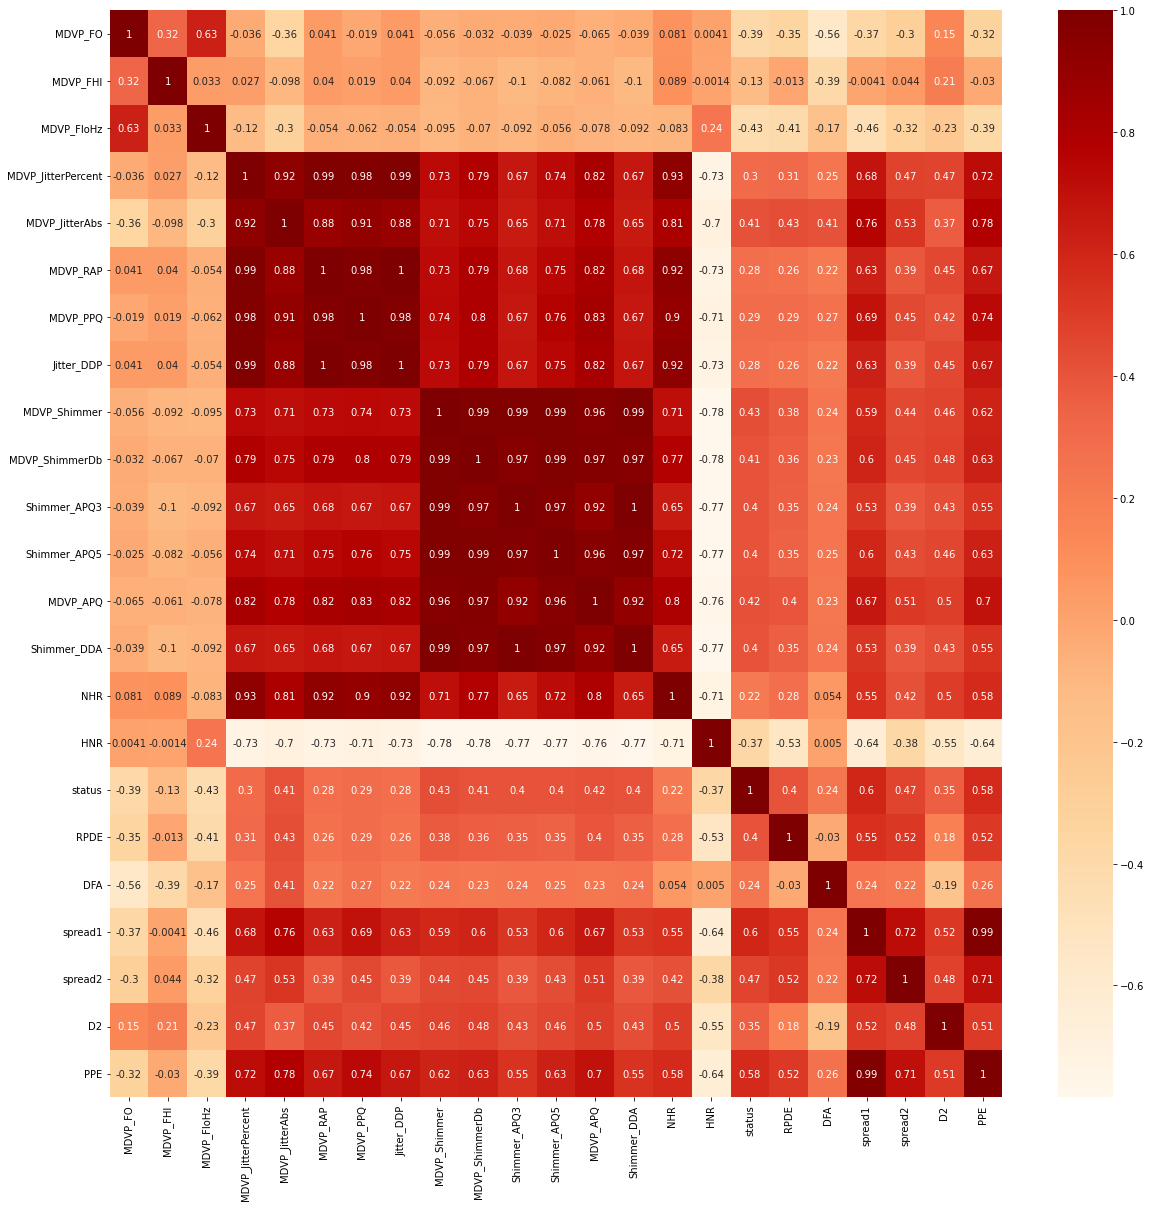

In [12]:
w=cor_matrix(data_scaled)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(fitur, target, test_size=0.2, random_state=0)

print(x_train.shape, x_test.shape)

(156, 22) (39, 22)


In [14]:
model_log=LogisticRegression()
model_log.fit(x_train, y_train)

c:\Users\fatha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = model_log.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.90      0.97      0.93        29

    accuracy                           0.90        39
   macro avg       0.89      0.83      0.86        39
weighted avg       0.90      0.90      0.89        39



In [16]:
def grafikCM(target_asli, hasil_prediksi, title=""):
    cm = confusion_matrix(target_asli, hasil_prediksi)
    jumlah_label = pd.Series(target_asli).nunique()

    fig, ax = plt.subplots(figsize=(jumlah_label, jumlah_label))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', color='black')
    ax.set_ylabel('Actual outputs', color='black')
    ax.xaxis.set(ticks=range(jumlah_label))
    ax.yaxis.set(ticks=range(jumlah_label))
    ax.set_ylim(jumlah_label-0.5, -0.5)
    for i in range(jumlah_label):
        for j in range(jumlah_label):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
    
    plt.title(title)
    plt.show()

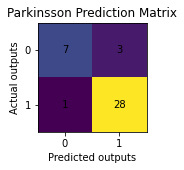

In [17]:
grafikCM(y_test, y_pred, title="Parkinsson Prediction Matrix")

Text(0.5, 1.0, 'error rate')

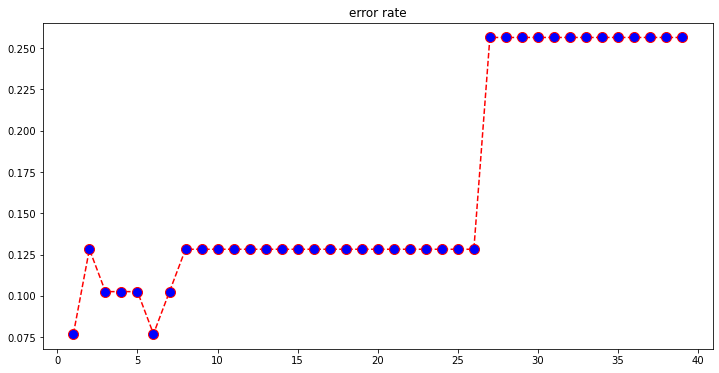

In [18]:
error =[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i !=y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle= 'dashed', marker='o', markerfacecolor='blue', markersize='10')
plt.title('error rate')

In [19]:
model_knn= KNeighborsClassifier(n_neighbors=6)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [20]:
print(model_knn.score(x_test, y_test))

y_pred = model_knn.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9230769230769231
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

[[ 8  2]
 [ 1 28]]


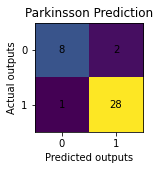

In [21]:
grafikCM(y_test, y_pred, title="Parkinsson Prediction")

In [22]:
model_sv = SVC()
model_sv.fit(x_train, y_train)

SVC()

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.83      1.00      0.91        29

    accuracy                           0.85        39
   macro avg       0.91      0.70      0.74        39
weighted avg       0.87      0.85      0.82        39



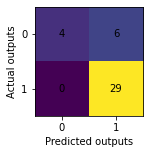

In [23]:
y_pred = model_sv.predict(x_test)

print(classification_report(y_test, y_pred))
grafikCM(y_test, y_pred)

In [24]:
model_tree = DecisionTreeClassifier(random_state=3)
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=3)

In [25]:
y_pred = model_tree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



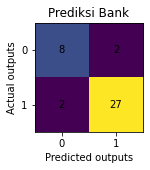

In [26]:
grafikCM(y_test, y_pred, title="Prediksi Bank")

In [27]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       1.00      0.55      0.71        29

    accuracy                           0.67        39
   macro avg       0.72      0.78      0.66        39
weighted avg       0.86      0.67      0.68        39



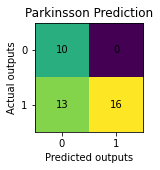

In [28]:
y_pred = model_nb.predict(x_test)

print(classification_report(y_test, y_pred))

grafikCM(y_test, y_pred, title="Parkinsson Prediction")

In [29]:
model_random= RandomForestClassifier(random_state=3)
model_random.fit(x_train,y_train)

RandomForestClassifier(random_state=3)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39



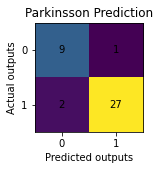

In [30]:
y_pred = model_random.predict(x_test)

print(classification_report(y_test, y_pred))

grafikCM(y_test, y_pred, title="Parkinsson Prediction")

# Kesimpulan
- Most accurate models are KNN and Random Tree Classifier with 92% Accuracy.
- 